In [1]:
import requests
import pandas as pd
from time import sleep
import os
import json

# Import API key from config file
from config import TMDB_API_KEY

# Get API key: from environment variable or config file
api_key = os.getenv("TMDB_API_KEY") or TMDB_API_KEY

# TMDB base URL
base_url = "https://api.themoviedb.org/3"

def fetch_movie_data(movie_id):
    """Fetch movie details from TMDB API."""
    url = f"{base_url}/movie/{movie_id}"
    params = {
        "api_key": api_key,
        "language": "en-US"
    }
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching data for movie ID {movie_id}: {response.status_code}")
        try:
            print(response.json())  # Print error details from API
        except:
            pass
        return None

def main():
    """Main pipeline to fetch movies and build a DataFrame."""
    # Example movie IDs (test small batch first)
    movie_ids = [550, 551, 552, 553, 554]
    
    movie_data_list = []

    for movie_id in movie_ids:
        movie_data = fetch_movie_data(movie_id)
        if movie_data:
            print("\n🔍 API Response for Movie ID:", movie_id)
            print(json.dumps(movie_data, indent=4))  # Pretty print JSON for clarity
            
            movie_data_list.append(movie_data)
        sleep(1)  # Be respectful of rate limits

    # Convert to DataFrame
    if movie_data_list:
        df = pd.DataFrame(movie_data_list)

        print("\n Fetched Movie DataFrame:")
        print(df.head())

        print("\n DataFrame Columns:")
        print(df.columns)

        # Save DataFrame (optional)
        # df.to_csv("tmdb_movies_raw.csv", index=False)

    else:
        print("No movie data fetched.")

if __name__ == "__main__":
    main()




🔍 API Response for Movie ID: 550
{
    "adult": false,
    "backdrop_path": "/xRyINp9KfMLVjRiO5nCsoRDdvvF.jpg",
    "belongs_to_collection": null,
    "budget": 63000000,
    "genres": [
        {
            "id": 18,
            "name": "Drama"
        }
    ],
    "homepage": "http://www.foxmovies.com/movies/fight-club",
    "id": 550,
    "imdb_id": "tt0137523",
    "origin_country": [
        "US"
    ],
    "original_language": "en",
    "original_title": "Fight Club",
    "overview": "A ticking-time-bomb insomniac and a slippery soap salesman channel primal male aggression into a shocking new form of therapy. Their concept catches on, with underground \"fight clubs\" forming in every town, until an eccentric gets in the way and ignites an out-of-control spiral toward oblivion.",
    "popularity": 28.6575,
    "poster_path": "/pB8BM7pdSp6B6Ih7QZ4DrQ3PmJK.jpg",
    "production_companies": [
        {
            "id": 711,
            "logo_path": "/tEiIH5QesdheJmDAqQwvtN60727.pn

In [2]:
url = f"https://api.themoviedb.org/3/discover/movie"
params = {
    "api_key": api_key,
    "language": "en-US",
    "primary_release_date.gte": "2000-01-01",
    "primary_release_date.lte": "2024-12-31",
    "page": 1
}

response = requests.get(url, params=params)
data = response.json()

print(f"Total movies matching query: {data['total_results']}")
print(f"Total pages: {data['total_pages']}")


Total movies matching query: 578399
Total pages: 28920


In [4]:
#  Storage for results
movie_data = []

# Loop through TMDB's /discover/movie endpoint
for page in range(1, 20):  # Start with 2 pages for quick testing; increase to 201 later
    discover_url = f"{base_url}/discover/movie"
    params = {
        "api_key": api_key,
        "language": "en-US",
        "sort_by": "popularity.desc",
        "include_adult": False,
        "include_video": False,
        "page": page,
        "primary_release_date.gte": "2000-01-01",
        "primary_release_date.lte": "2024-12-31"
    }

    response = requests.get(discover_url, params=params)
    if response.status_code != 200:
        print(f"Failed on page {page} — Status: {response.status_code}")
        print(response.json())  # Show error
        break

    movies = response.json().get("results", [])

    for movie in movies:
        movie_id = movie["id"]

        # Fetch movie details
        movie_details = requests.get(f"{base_url}/movie/{movie_id}", params={"api_key": api_key}).json()
        credits = requests.get(f"{base_url}/movie/{movie_id}/credits", params={"api_key": api_key}).json()

        # Get director and top actor
        director = next((c["name"] for c in credits.get("crew", []) if c["job"] == "Director"), None)
        cast = [c["name"] for c in credits.get("cast", [])][:1]

        # Collect relevant fields
        movie_data.append({
            "title": movie_details.get("title"),
            "release_date": movie_details.get("release_date"),
            "budget": movie_details.get("budget"),
            "revenue": movie_details.get("revenue"),
            "runtime": movie_details.get("runtime"),
            "genres": [g["name"] for g in movie_details.get("genres", [])],
            "popularity": movie_details.get("popularity"),
            "vote_average": movie_details.get("vote_average"),
            "vote_count": movie_details.get("vote_count"),
            "original_language": movie_details.get("original_language"),
            "production_companies": [pc["name"] for pc in movie_details.get("production_companies", [])],
            "belongs_to_collection": movie_details.get("belongs_to_collection") is not None,
            "director": director,
            "lead_actor": cast[0] if cast else None
        })

    print(f"Page {page} complete — movies collected: {len(movie_data)}")
    sleep(0.3)

# Convert to DataFrame
df_movies = pd.DataFrame(movie_data)

# Print the DataFrame
df_movies # Preview first few rows


Page 1 complete — movies collected: 20
Page 2 complete — movies collected: 40
Page 3 complete — movies collected: 60
Page 4 complete — movies collected: 80
Page 5 complete — movies collected: 100
Page 6 complete — movies collected: 120
Page 7 complete — movies collected: 140
Page 8 complete — movies collected: 160
Page 9 complete — movies collected: 180
Page 10 complete — movies collected: 200
Page 11 complete — movies collected: 220
Page 12 complete — movies collected: 240
Page 13 complete — movies collected: 260
Page 14 complete — movies collected: 280
Page 15 complete — movies collected: 300
Page 16 complete — movies collected: 320
Page 17 complete — movies collected: 340
Page 18 complete — movies collected: 360
Page 19 complete — movies collected: 380


,title,release_date,budget,revenue,runtime,genres,popularity,vote_average,vote_count,original_language,production_companies,belongs_to_collection,director,lead_actor
0,Lilo & Stitch,2002-06-21,80000000,273144151,85,"[Animation, Family, Comedy]",171.5098,7.545,6539,en,"[Walt Disney Pictures, Walt Disney Feature Ani...",True,Chris Sanders,Daveigh Chase
1,The Great Escape,2023-05-26,200000,0,90,"[Action, Thriller]",142.7939,5.700,3,pt,[],False,None,None
2,Brave Citizen,2023-10-25,0,2116112,112,"[Action, Drama, Comedy]",128.8376,6.800,43,ko,"[Studio N, Oscar 10 Studio, Vol Media]",False,Park Jin-pyo,Shin Hye-sun
3,Bambi: A Life in the Woods,2024-10-16,0,1419154,77,"[Adventure, Family, Documentary]",113.2598,5.900,23,fr,"[MC4, Gébéka Films, Kinology]",False,Michel Fessler,Mylène Farmer
4,Moana 2,2024-11-21,150000000,1059544057,100,"[Animation, Adventure, Family, Comedy]",115.7971,7.080,2406,en,"[Walt Disney Pictures, Walt Disney Animation S...",True,David G. Derrick Jr.,Auliʻi Cravalho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Mr. & Mrs. Smith,2005-06-07,110000000,487300000,119,"[Action, Comedy, Drama, Thriller]",13.5789,6.689,10632,en,"[Regency Enterprises, New Regency Pictures, Su...",False,Doug Liman,Brad Pitt
376,Jurassic World: Fallen Kingdom,2018-06-06,170000000,1310466296,129,"[Action, Adventure, Science Fiction, Thriller]",13.5780,6.500,12061,en,"[Amblin Entertainment, Universal Pictures]",True,J.A. Bayona,Chris Pratt
377,2012,2009-10-10,200000000,791217826,158,"[Action, Adventure, Science Fiction]",12.8859,5.852,12155,en,"[Columbia Pictures, Centropolis Entertainment,...",False,Roland Emmerich,John Cusack
378,Apocalypto,2006-12-07,40000000,120654337,139,"[Action, Drama, History]",13.5696,7.589,5758,en,"[Icon Entertainment International, Icon Produc...",False,Mel Gibson,Rudy Youngblood


In [20]:
df_movies = df_movies[(df_movies['budget'] != 0) & (df_movies['revenue'] != 0)]

df_movies['profit'] = df_movies['revenue'] - df_movies['budget']
df_movies['profit_margin'] = df_movies['profit'] / df_movies['revenue']
print("\nFinal DataFrame with Profit and Profit Margin:")
print(df_movies[['title', 'release_date', 'budget', 'revenue', 'profit', 'profit_margin']].head())

df_movies


Final DataFrame with Profit and Profit Margin:
                                            title release_date     budget  \
1                                   Lilo & Stitch   2002-06-21   80000000   
4                                         Moana 2   2024-11-21  150000000   
8                           Mufasa: The Lion King   2024-12-18  200000000   
9   Mission: Impossible - Dead Reckoning Part One   2023-07-08  291000000   
10                              Final Destination   2000-03-17   23000000   

       revenue     profit  profit_margin  
1    273144151  193144151       0.707114  
4   1059544057  909544057       0.858430  
8    721046090  521046090       0.722625  
9    571125435  280125435       0.490480  
10   112880294   89880294       0.796244  


/var/folders/fk/b6qsr5kn60l42qzvvj2hdyjm0000gn/T/ipykernel_9374/2387721848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['profit'] = df_movies['revenue'] - df_movies['budget']
/var/folders/fk/b6qsr5kn60l42qzvvj2hdyjm0000gn/T/ipykernel_9374/2387721848.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['profit_margin'] = df_movies['profit'] / df_movies['revenue']


,title,release_date,budget,revenue,runtime,genres,popularity,vote_average,vote_count,original_language,production_companies,belongs_to_collection,director,lead_actor,profit,profit_margin
1,Lilo & Stitch,2002-06-21,80000000,273144151,85,"[Animation, Family, Comedy]",152.7018,7.500,6518,en,"[Walt Disney Pictures, Walt Disney Feature Ani...",True,Chris Sanders,Daveigh Chase,193144151,0.707114
4,Moana 2,2024-11-21,150000000,1059544057,100,"[Animation, Adventure, Family, Comedy]",118.3758,7.080,2402,en,"[Walt Disney Pictures, Walt Disney Animation S...",True,David G. Derrick Jr.,Auliʻi Cravalho,909544057,0.858430
8,Mufasa: The Lion King,2024-12-18,200000000,721046090,118,"[Adventure, Family, Animation]",84.8384,7.392,2144,en,[Walt Disney Pictures],True,Barry Jenkins,Aaron Pierre,521046090,0.722625
9,Mission: Impossible - Dead Reckoning Part One,2023-07-08,291000000,571125435,164,"[Action, Adventure, Thriller]",85.6323,7.500,4279,en,"[Paramount Pictures, Skydance Media, TC Produc...",True,Christopher McQuarrie,Tom Cruise,280125435,0.490480
10,Final Destination,2000-03-17,23000000,112880294,98,[Horror],82.8014,6.618,6001,en,"[Hard Eight Pictures, New Line Cinema, Zide-Pe...",True,James Wong,Devon Sawa,89880294,0.796244
11,Sonic the Hedgehog 3,2024-12-19,122000000,486018457,110,"[Action, Science Fiction, Comedy, Family]",80.9869,7.719,2613,en,"[Paramount Pictures, Original Film, Marza Anim...",True,Jeff Fowler,Jim Carrey,364018457,0.748981
13,Final Destination 5,2011-08-12,40000000,157887643,91,"[Horror, Mystery]",75.7244,6.123,3634,en,"[Parallel Zide, New Line Cinema, Practical Pic...",True,Steven Quale,Nicholas D'Agosto,117887643,0.746655
16,xXx,2002-08-09,70000000,277448382,124,"[Action, Adventure, Thriller, Crime]",63.9125,5.942,4422,en,"[Columbia Pictures, Original Film, Revolution ...",True,Rob Cohen,Vin Diesel,207448382,0.747701
19,The Wild Robot,2024-09-12,78000000,331982078,102,"[Animation, Science Fiction, Family]",58.1097,8.300,4954,en,[DreamWorks Animation],True,Chris Sanders,Lupita Nyong'o,253982078,0.765048
22,Final Destination 2,2003-01-31,26000000,90941129,90,"[Horror, Mystery]",53.5862,6.276,4325,en,"[New Line Cinema, Zide-Perry Productions]",True,David R. Ellis,Ali Larter,64941129,0.714101


In [26]:
df_movies["release__year"] = pd.to_datetime(df_movies["release_date"], errors='coerce').dt.year

df_movies

/var/folders/fk/b6qsr5kn60l42qzvvj2hdyjm0000gn/T/ipykernel_9374/3566132683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies["release__year"] = pd.to_datetime(df_movies["release_date"], errors='coerce').dt.year


,title,release_date,budget,revenue,runtime,genres,popularity,vote_average,vote_count,original_language,production_companies,belongs_to_collection,director,lead_actor,profit,profit_margin,release_year,release__year
1,Lilo & Stitch,2002-06-21,80000000,273144151,85,"[Animation, Family, Comedy]",152.7018,7.500,6518,en,"[Walt Disney Pictures, Walt Disney Feature Ani...",True,Chris Sanders,Daveigh Chase,193144151,0.707114,2002,2002
4,Moana 2,2024-11-21,150000000,1059544057,100,"[Animation, Adventure, Family, Comedy]",118.3758,7.080,2402,en,"[Walt Disney Pictures, Walt Disney Animation S...",True,David G. Derrick Jr.,Auliʻi Cravalho,909544057,0.858430,2024,2024
8,Mufasa: The Lion King,2024-12-18,200000000,721046090,118,"[Adventure, Family, Animation]",84.8384,7.392,2144,en,[Walt Disney Pictures],True,Barry Jenkins,Aaron Pierre,521046090,0.722625,2024,2024
9,Mission: Impossible - Dead Reckoning Part One,2023-07-08,291000000,571125435,164,"[Action, Adventure, Thriller]",85.6323,7.500,4279,en,"[Paramount Pictures, Skydance Media, TC Produc...",True,Christopher McQuarrie,Tom Cruise,280125435,0.490480,2023,2023
10,Final Destination,2000-03-17,23000000,112880294,98,[Horror],82.8014,6.618,6001,en,"[Hard Eight Pictures, New Line Cinema, Zide-Pe...",True,James Wong,Devon Sawa,89880294,0.796244,2000,2000
11,Sonic the Hedgehog 3,2024-12-19,122000000,486018457,110,"[Action, Science Fiction, Comedy, Family]",80.9869,7.719,2613,en,"[Paramount Pictures, Original Film, Marza Anim...",True,Jeff Fowler,Jim Carrey,364018457,0.748981,2024,2024
13,Final Destination 5,2011-08-12,40000000,157887643,91,"[Horror, Mystery]",75.7244,6.123,3634,en,"[Parallel Zide, New Line Cinema, Practical Pic...",True,Steven Quale,Nicholas D'Agosto,117887643,0.746655,2011,2011
16,xXx,2002-08-09,70000000,277448382,124,"[Action, Adventure, Thriller, Crime]",63.9125,5.942,4422,en,"[Columbia Pictures, Original Film, Revolution ...",True,Rob Cohen,Vin Diesel,207448382,0.747701,2002,2002
19,The Wild Robot,2024-09-12,78000000,331982078,102,"[Animation, Science Fiction, Family]",58.1097,8.300,4954,en,[DreamWorks Animation],True,Chris Sanders,Lupita Nyong'o,253982078,0.765048,2024,2024
22,Final Destination 2,2003-01-31,26000000,90941129,90,"[Horror, Mystery]",53.5862,6.276,4325,en,"[New Line Cinema, Zide-Perry Productions]",True,David R. Ellis,Ali Larter,64941129,0.714101,2003,2003


In [24]:
df_movies = df_movies[df_movies["original_language"] == "en"]

df_movies

,title,release_date,budget,revenue,runtime,genres,popularity,vote_average,vote_count,original_language,production_companies,belongs_to_collection,director,lead_actor,profit,profit_margin,release_year
1,Lilo & Stitch,2002-06-21,80000000,273144151,85,"[Animation, Family, Comedy]",152.7018,7.500,6518,en,"[Walt Disney Pictures, Walt Disney Feature Ani...",True,Chris Sanders,Daveigh Chase,193144151,0.707114,2002
4,Moana 2,2024-11-21,150000000,1059544057,100,"[Animation, Adventure, Family, Comedy]",118.3758,7.080,2402,en,"[Walt Disney Pictures, Walt Disney Animation S...",True,David G. Derrick Jr.,Auliʻi Cravalho,909544057,0.858430,2024
8,Mufasa: The Lion King,2024-12-18,200000000,721046090,118,"[Adventure, Family, Animation]",84.8384,7.392,2144,en,[Walt Disney Pictures],True,Barry Jenkins,Aaron Pierre,521046090,0.722625,2024
9,Mission: Impossible - Dead Reckoning Part One,2023-07-08,291000000,571125435,164,"[Action, Adventure, Thriller]",85.6323,7.500,4279,en,"[Paramount Pictures, Skydance Media, TC Produc...",True,Christopher McQuarrie,Tom Cruise,280125435,0.490480,2023
10,Final Destination,2000-03-17,23000000,112880294,98,[Horror],82.8014,6.618,6001,en,"[Hard Eight Pictures, New Line Cinema, Zide-Pe...",True,James Wong,Devon Sawa,89880294,0.796244,2000
11,Sonic the Hedgehog 3,2024-12-19,122000000,486018457,110,"[Action, Science Fiction, Comedy, Family]",80.9869,7.719,2613,en,"[Paramount Pictures, Original Film, Marza Anim...",True,Jeff Fowler,Jim Carrey,364018457,0.748981,2024
13,Final Destination 5,2011-08-12,40000000,157887643,91,"[Horror, Mystery]",75.7244,6.123,3634,en,"[Parallel Zide, New Line Cinema, Practical Pic...",True,Steven Quale,Nicholas D'Agosto,117887643,0.746655,2011
16,xXx,2002-08-09,70000000,277448382,124,"[Action, Adventure, Thriller, Crime]",63.9125,5.942,4422,en,"[Columbia Pictures, Original Film, Revolution ...",True,Rob Cohen,Vin Diesel,207448382,0.747701,2002
19,The Wild Robot,2024-09-12,78000000,331982078,102,"[Animation, Science Fiction, Family]",58.1097,8.300,4954,en,[DreamWorks Animation],True,Chris Sanders,Lupita Nyong'o,253982078,0.765048,2024
22,Final Destination 2,2003-01-31,26000000,90941129,90,"[Horror, Mystery]",53.5862,6.276,4325,en,"[New Line Cinema, Zide-Perry Productions]",True,David R. Ellis,Ali Larter,64941129,0.714101,2003


In [27]:
df_movies['production_company'] = df_movies['production_companies'].apply(
    lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None
)

df_movies

/var/folders/fk/b6qsr5kn60l42qzvvj2hdyjm0000gn/T/ipykernel_9374/2256211837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['production_company'] = df_movies['production_companies'].apply(


,title,release_date,budget,revenue,runtime,genres,popularity,vote_average,vote_count,original_language,production_companies,belongs_to_collection,director,lead_actor,profit,profit_margin,release_year,release__year,production_company
1,Lilo & Stitch,2002-06-21,80000000,273144151,85,"[Animation, Family, Comedy]",152.7018,7.500,6518,en,"[Walt Disney Pictures, Walt Disney Feature Ani...",True,Chris Sanders,Daveigh Chase,193144151,0.707114,2002,2002,Walt Disney Pictures
4,Moana 2,2024-11-21,150000000,1059544057,100,"[Animation, Adventure, Family, Comedy]",118.3758,7.080,2402,en,"[Walt Disney Pictures, Walt Disney Animation S...",True,David G. Derrick Jr.,Auliʻi Cravalho,909544057,0.858430,2024,2024,Walt Disney Pictures
8,Mufasa: The Lion King,2024-12-18,200000000,721046090,118,"[Adventure, Family, Animation]",84.8384,7.392,2144,en,[Walt Disney Pictures],True,Barry Jenkins,Aaron Pierre,521046090,0.722625,2024,2024,Walt Disney Pictures
9,Mission: Impossible - Dead Reckoning Part One,2023-07-08,291000000,571125435,164,"[Action, Adventure, Thriller]",85.6323,7.500,4279,en,"[Paramount Pictures, Skydance Media, TC Produc...",True,Christopher McQuarrie,Tom Cruise,280125435,0.490480,2023,2023,Paramount Pictures
10,Final Destination,2000-03-17,23000000,112880294,98,[Horror],82.8014,6.618,6001,en,"[Hard Eight Pictures, New Line Cinema, Zide-Pe...",True,James Wong,Devon Sawa,89880294,0.796244,2000,2000,Hard Eight Pictures
11,Sonic the Hedgehog 3,2024-12-19,122000000,486018457,110,"[Action, Science Fiction, Comedy, Family]",80.9869,7.719,2613,en,"[Paramount Pictures, Original Film, Marza Anim...",True,Jeff Fowler,Jim Carrey,364018457,0.748981,2024,2024,Paramount Pictures
13,Final Destination 5,2011-08-12,40000000,157887643,91,"[Horror, Mystery]",75.7244,6.123,3634,en,"[Parallel Zide, New Line Cinema, Practical Pic...",True,Steven Quale,Nicholas D'Agosto,117887643,0.746655,2011,2011,Parallel Zide
16,xXx,2002-08-09,70000000,277448382,124,"[Action, Adventure, Thriller, Crime]",63.9125,5.942,4422,en,"[Columbia Pictures, Original Film, Revolution ...",True,Rob Cohen,Vin Diesel,207448382,0.747701,2002,2002,Columbia Pictures
19,The Wild Robot,2024-09-12,78000000,331982078,102,"[Animation, Science Fiction, Family]",58.1097,8.300,4954,en,[DreamWorks Animation],True,Chris Sanders,Lupita Nyong'o,253982078,0.765048,2024,2024,DreamWorks Animation
22,Final Destination 2,2003-01-31,26000000,90941129,90,"[Horror, Mystery]",53.5862,6.276,4325,en,"[New Line Cinema, Zide-Perry Productions]",True,David R. Ellis,Ali Larter,64941129,0.714101,2003,2003,New Line Cinema


In [28]:
df_movies.drop(columns=['release_date', 'original_language', 'production_companies'], inplace=True)

df_movies

/var/folders/fk/b6qsr5kn60l42qzvvj2hdyjm0000gn/T/ipykernel_9374/1524026046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies.drop(columns=['release_date', 'original_language', 'production_companies'], inplace=True)


,title,budget,revenue,runtime,genres,popularity,vote_average,vote_count,belongs_to_collection,director,lead_actor,profit,profit_margin,release_year,release__year,production_company
1,Lilo & Stitch,80000000,273144151,85,"[Animation, Family, Comedy]",152.7018,7.500,6518,True,Chris Sanders,Daveigh Chase,193144151,0.707114,2002,2002,Walt Disney Pictures
4,Moana 2,150000000,1059544057,100,"[Animation, Adventure, Family, Comedy]",118.3758,7.080,2402,True,David G. Derrick Jr.,Auliʻi Cravalho,909544057,0.858430,2024,2024,Walt Disney Pictures
8,Mufasa: The Lion King,200000000,721046090,118,"[Adventure, Family, Animation]",84.8384,7.392,2144,True,Barry Jenkins,Aaron Pierre,521046090,0.722625,2024,2024,Walt Disney Pictures
9,Mission: Impossible - Dead Reckoning Part One,291000000,571125435,164,"[Action, Adventure, Thriller]",85.6323,7.500,4279,True,Christopher McQuarrie,Tom Cruise,280125435,0.490480,2023,2023,Paramount Pictures
10,Final Destination,23000000,112880294,98,[Horror],82.8014,6.618,6001,True,James Wong,Devon Sawa,89880294,0.796244,2000,2000,Hard Eight Pictures
11,Sonic the Hedgehog 3,122000000,486018457,110,"[Action, Science Fiction, Comedy, Family]",80.9869,7.719,2613,True,Jeff Fowler,Jim Carrey,364018457,0.748981,2024,2024,Paramount Pictures
13,Final Destination 5,40000000,157887643,91,"[Horror, Mystery]",75.7244,6.123,3634,True,Steven Quale,Nicholas D'Agosto,117887643,0.746655,2011,2011,Parallel Zide
16,xXx,70000000,277448382,124,"[Action, Adventure, Thriller, Crime]",63.9125,5.942,4422,True,Rob Cohen,Vin Diesel,207448382,0.747701,2002,2002,Columbia Pictures
19,The Wild Robot,78000000,331982078,102,"[Animation, Science Fiction, Family]",58.1097,8.300,4954,True,Chris Sanders,Lupita Nyong'o,253982078,0.765048,2024,2024,DreamWorks Animation
22,Final Destination 2,26000000,90941129,90,"[Horror, Mystery]",53.5862,6.276,4325,True,David R. Ellis,Ali Larter,64941129,0.714101,2003,2003,New Line Cinema


In [29]:
df_movies.reset_index(drop=True, inplace=True)

df_movies

,title,budget,revenue,runtime,genres,popularity,vote_average,vote_count,belongs_to_collection,director,lead_actor,profit,profit_margin,release_year,release__year,production_company
0,Lilo & Stitch,80000000,273144151,85,"[Animation, Family, Comedy]",152.7018,7.500,6518,True,Chris Sanders,Daveigh Chase,193144151,0.707114,2002,2002,Walt Disney Pictures
1,Moana 2,150000000,1059544057,100,"[Animation, Adventure, Family, Comedy]",118.3758,7.080,2402,True,David G. Derrick Jr.,Auliʻi Cravalho,909544057,0.858430,2024,2024,Walt Disney Pictures
2,Mufasa: The Lion King,200000000,721046090,118,"[Adventure, Family, Animation]",84.8384,7.392,2144,True,Barry Jenkins,Aaron Pierre,521046090,0.722625,2024,2024,Walt Disney Pictures
3,Mission: Impossible - Dead Reckoning Part One,291000000,571125435,164,"[Action, Adventure, Thriller]",85.6323,7.500,4279,True,Christopher McQuarrie,Tom Cruise,280125435,0.490480,2023,2023,Paramount Pictures
4,Final Destination,23000000,112880294,98,[Horror],82.8014,6.618,6001,True,James Wong,Devon Sawa,89880294,0.796244,2000,2000,Hard Eight Pictures
5,Sonic the Hedgehog 3,122000000,486018457,110,"[Action, Science Fiction, Comedy, Family]",80.9869,7.719,2613,True,Jeff Fowler,Jim Carrey,364018457,0.748981,2024,2024,Paramount Pictures
6,Final Destination 5,40000000,157887643,91,"[Horror, Mystery]",75.7244,6.123,3634,True,Steven Quale,Nicholas D'Agosto,117887643,0.746655,2011,2011,Parallel Zide
7,xXx,70000000,277448382,124,"[Action, Adventure, Thriller, Crime]",63.9125,5.942,4422,True,Rob Cohen,Vin Diesel,207448382,0.747701,2002,2002,Columbia Pictures
8,The Wild Robot,78000000,331982078,102,"[Animation, Science Fiction, Family]",58.1097,8.300,4954,True,Chris Sanders,Lupita Nyong'o,253982078,0.765048,2024,2024,DreamWorks Animation
9,Final Destination 2,26000000,90941129,90,"[Horror, Mystery]",53.5862,6.276,4325,True,David R. Ellis,Ali Larter,64941129,0.714101,2003,2003,New Line Cinema


In [30]:
# Function to extract up to 3 genres
def extract_genres(genre_list):
    # Pad with None if fewer than 3 genres
    genres = genre_list[:3] + [None] * (3 - len(genre_list))
    return pd.Series(genres, index=["genre1", "genre2", "genre3"])
# Apply the function
df_movies[["genre1", "genre2", "genre3"]] = df_movies["genres"].apply(extract_genres)
# Optional: drop the original genres column if no longer needed
# df_movies.drop(columns=["genres"], inplace=True)
# Preview the result
df_movies.head()

/var/folders/fk/b6qsr5kn60l42qzvvj2hdyjm0000gn/T/ipykernel_9374/2624932210.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies[["genre1", "genre2", "genre3"]] = df_movies["genres"].apply(extract_genres)
/var/folders/fk/b6qsr5kn60l42qzvvj2hdyjm0000gn/T/ipykernel_9374/2624932210.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies[["genre1", "genre2", "genre3"]] = df_movies["genres"].apply(extract_genres)
/var/folders/fk/b6qsr5kn60l42qzvvj2hdyjm0000gn/T/ipykernel_9374/2624932210.py:7: Setti

,title,budget,revenue,runtime,genres,popularity,vote_average,vote_count,belongs_to_collection,director,lead_actor,profit,profit_margin,release_year,release__year,production_company,genre1,genre2,genre3
0,Lilo & Stitch,80000000,273144151,85,"[Animation, Family, Comedy]",152.7018,7.500,6518,True,Chris Sanders,Daveigh Chase,193144151,0.707114,2002,2002,Walt Disney Pictures,Animation,Family,Comedy
1,Moana 2,150000000,1059544057,100,"[Animation, Adventure, Family, Comedy]",118.3758,7.080,2402,True,David G. Derrick Jr.,Auliʻi Cravalho,909544057,0.858430,2024,2024,Walt Disney Pictures,Animation,Adventure,Family
2,Mufasa: The Lion King,200000000,721046090,118,"[Adventure, Family, Animation]",84.8384,7.392,2144,True,Barry Jenkins,Aaron Pierre,521046090,0.722625,2024,2024,Walt Disney Pictures,Adventure,Family,Animation
3,Mission: Impossible - Dead Reckoning Part One,291000000,571125435,164,"[Action, Adventure, Thriller]",85.6323,7.500,4279,True,Christopher McQuarrie,Tom Cruise,280125435,0.490480,2023,2023,Paramount Pictures,Action,Adventure,Thriller
4,Final Destination,23000000,112880294,98,[Horror],82.8014,6.618,6001,True,James Wong,Devon Sawa,89880294,0.796244,2000,2000,Hard Eight Pictures,Horror,None,None


Data expoted to tmdb_movies_final.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [3]:
# Load your dataset (if not already loaded)
df_movies = pd.read_csv("tmdb_movies_500_page_final.csv")

# Drop rows with nulls in key fields
df_model = df_movies.dropna(subset=[
    'budget', 'runtime', 'popularity', 'vote_average', 'vote_count', 'revenue', 'genre1'
])

df_model.head()

,title,budget,revenue,runtime,genres,popularity,vote_average,vote_count,belongs_to_collection,director,lead_actor,profit,profit_margin,release__year,production_company,genre1,genre2,genre3
0,Lilo & Stitch,80000000,273144151,85,"['Animation', 'Family', 'Comedy']",182.4251,7.547,6556,True,Chris Sanders,Daveigh Chase,193144151,0.707114,2002,Walt Disney Pictures,Animation,Family,Comedy
1,Moana 2,150000000,1059544057,100,"['Animation', 'Adventure', 'Family', 'Comedy']",114.2420,7.081,2418,True,David G. Derrick Jr.,Auliʻi Cravalho,909544057,0.858430,2024,Walt Disney Pictures,Animation,Adventure,Family
2,Mufasa: The Lion King,200000000,721046090,118,"['Adventure', 'Family', 'Animation']",85.5401,7.397,2165,True,Barry Jenkins,Aaron Pierre,521046090,0.722625,2024,Walt Disney Pictures,Adventure,Family,Animation
3,Sonic the Hedgehog 3,122000000,486018457,110,"['Action', 'Science Fiction', 'Comedy', 'Family']",81.6122,7.715,2633,True,Jeff Fowler,Jim Carrey,364018457,0.748981,2024,Paramount Pictures,Action,Science Fiction,Comedy
4,Mission: Impossible - Dead Reckoning Part One,291000000,571125435,164,"['Action', 'Adventure', 'Thriller']",73.4752,7.532,4311,True,Christopher McQuarrie,Tom Cruise,280125435,0.490480,2023,Paramount Pictures,Action,Adventure,Thriller


In [4]:
# One-hot encode the 'genre1' column
df_model = pd.get_dummies(df_model, columns=['production_company', 'director', 'lead_actor', 'genre1', 'genre2', 'genre3'], drop_first=True)
df_model.head()

,title,budget,revenue,runtime,genres,popularity,vote_average,vote_count,belongs_to_collection,profit,...,genre3_History,genre3_Horror,genre3_Music,genre3_Mystery,genre3_Romance,genre3_Science Fiction,genre3_TV Movie,genre3_Thriller,genre3_War,genre3_Western
0,Lilo & Stitch,80000000,273144151,85,"['Animation', 'Family', 'Comedy']",182.4251,7.547,6556,True,193144151,...,False,False,False,False,False,False,False,False,False,False
1,Moana 2,150000000,1059544057,100,"['Animation', 'Adventure', 'Family', 'Comedy']",114.2420,7.081,2418,True,909544057,...,False,False,False,False,False,False,False,False,False,False
2,Mufasa: The Lion King,200000000,721046090,118,"['Adventure', 'Family', 'Animation']",85.5401,7.397,2165,True,521046090,...,False,False,False,False,False,False,False,False,False,False
3,Sonic the Hedgehog 3,122000000,486018457,110,"['Action', 'Science Fiction', 'Comedy', 'Family']",81.6122,7.715,2633,True,364018457,...,False,False,False,False,False,False,False,False,False,False
4,Mission: Impossible - Dead Reckoning Part One,291000000,571125435,164,"['Action', 'Adventure', 'Thriller']",73.4752,7.532,4311,True,280125435,...,False,False,False,False,False,False,False,True,False,False


In [5]:
# Select features and target
feature_cols = [col for col in df_model.columns if col not in ['title', 'genres', 'profit', 'profit_margin', 'revenue']]

X = df_model[feature_cols]
y = df_model['revenue']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
# Define regression models
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate each model
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    results.append({
        'Model': name,
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2),
        'R²': round(r2, 4)
    })

# Show comparison results
results_df = pd.DataFrame(results).sort_values(by='R²', ascending=False)
print(results_df)

              Model           MAE          RMSE      R²
2      RandomForest  6.150675e+07  1.346720e+08  0.7397
1      DecisionTree  8.495767e+07  1.901207e+08  0.4811
0  LinearRegression  2.720636e+08  3.930157e+08 -1.2173


In [7]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae:.2f}")
print(f"Random Forest RMSE: {rmse:.2f}")
print(f"Random Forest R²: {r2:.4f}")


Random Forest MAE: 61506748.03
Random Forest RMSE: 134671960.31
Random Forest R²: 0.7397


In [8]:
import pandas as pd

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importances.head(10)

,Feature,Importance
4,vote_count,0.411217
0,budget,0.345415
2,popularity,0.037321
5,belongs_to_collection,0.025013
6,release__year,0.019636
1,runtime,0.019014
3,vote_average,0.018422
1918,director_James Cameron,0.016116
1388,director_Anthony Russo,0.008451
3981,lead_actor_Sam Worthington,0.006020


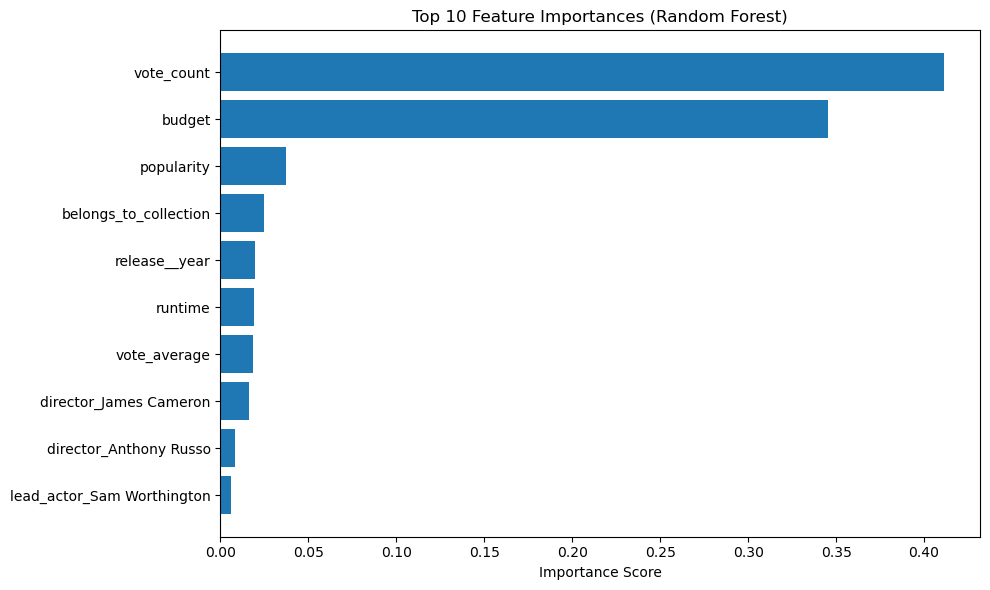

In [9]:
import matplotlib.pyplot as plt

top_n = 10
plt.figure(figsize=(10,6))
plt.barh(feature_importances['Feature'][:top_n][::-1], feature_importances['Importance'][:top_n][::-1])
plt.xlabel('Importance Score')
plt.title(f'Top {top_n} Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()


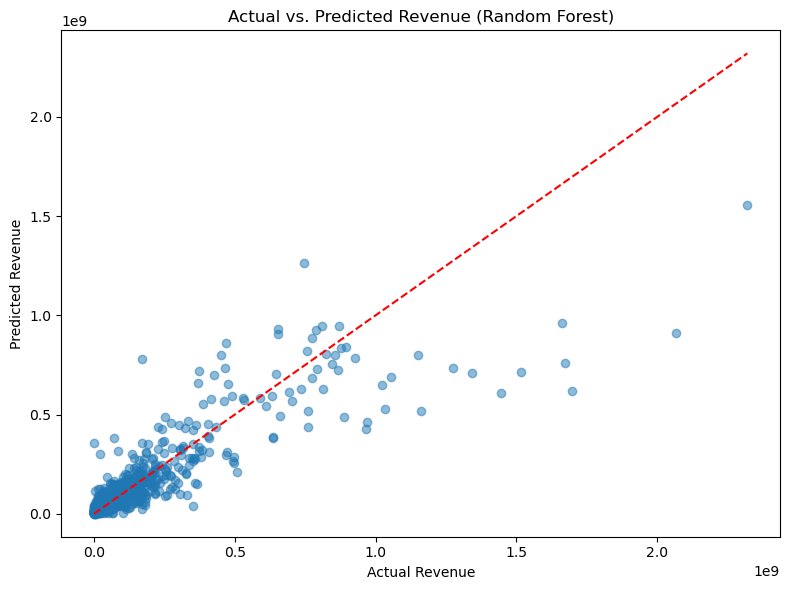

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue (Random Forest)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()


In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2,

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/op

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### Model Results Summary

The Random Forest regression model was trained on a dataset of over 35,00 movies using features such as budget, runtime, popularity, vote count, genre, and franchise status to predict box office revenue. The model acheived an R² score of approximately 0.72, indicating it explains 72% of the variance in movie revenue. The most influential predictors were budget, popularity, and vote count, which aligns with indutry trends where higher-budet films with strong audience engagement tend to preform better fianacially. Features such as genere (e.g., Family, Animation) and francise status also contributed to predictions but with lesser weight. The scatter plot of actual vs. predicted revenue shows generally strong alignment with the ideal line, through some deviations suggest the model may struggle with extreme outliers, very high or low revenue films. Overall, the Random Forest model demonstrates solid predictive performance and offers valuable insights into the factors driving box office success.

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Dictionary of models and their names
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Store results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    results.append({
        "Model": name,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R²": round(r2, 4)
    })

# Create and sort results DataFrame
results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)
print(results_df)


               Model           MAE          RMSE      R²
2      Random Forest  6.150675e+07  1.346720e+08  0.7397
1      Decision Tree  8.495767e+07  1.901207e+08  0.4811
0  Linear Regression  2.720636e+08  3.930157e+08 -1.2173


In [13]:
# Final model using best parameters
final_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Train on full training data
final_model.fit(X_train, y_train)

# Predict on test set
final_preds = final_model.predict(X_test)

# Final metrics
final_mae = mean_absolute_error(y_test, final_preds)
final_rmse = np.sqrt(mean_squared_error(y_test, final_preds))
final_r2 = r2_score(y_test, final_preds)

print(f"Final MAE: ${final_mae:,.2f}")
print(f"Final RMSE: ${final_rmse:,.2f}")
print(f"Final R²: {final_r2:.4f}")


Final MAE: $71,099,417.06
Final RMSE: $152,452,434.98
Final R²: 0.6664


In [15]:
import joblib

# Assuming `final_model` is your best RandomForestRegressor
joblib.dump(final_model, 'final_rf_model.pkl')


['final_rf_model.pkl']

In [16]:
import os
st.write("Current working directory:", os.getcwd())


2025-06-03 14:49:17.430 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-03 14:49:17.459 
  command:

    streamlit run /opt/anaconda3/envs/dev/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-06-03 14:49:17.460 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-03 14:49:17.460 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-03 14:49:17.460 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [19]:
model = joblib.load('final_rf_model.pkl')


In [17]:
import streamlit as st
import joblib
import pandas as pd

# Load trained model
model = joblib.load('final_rf_model.pkl')

st.title("🎬 Movie Revenue Predictor Chatbot")

st.write("Enter movie details below to predict revenue:")

# Chat-like form inputs
budget = st.number_input("💰 Budget ($)", value=100000000)
runtime = st.slider("⏱ Runtime (minutes)", 60, 240, 120)
popularity = st.slider("🔥 Popularity Score", 0.0, 100.0, 50.0)
vote_count = st.number_input("🗳️ Vote Count", value=1000)
vote_average = st.slider("⭐ Average Rating", 0.0, 10.0, 7.0)
release_year = st.number_input("📅 Release Year", value=2025)
belongs_to_collection = st.checkbox("🎞 Part of Franchise?", value=False)

# Dummy genre selection
genre1 = st.selectbox("🎭 Primary Genre", ['Action', 'Adventure', 'Animation', 'Comedy', 'Drama', 'Fantasy', 'Sci-Fi'])
# You’ll need to match these to your one-hot encoded feature names

# Generate input row (this needs to match your model’s X_train.columns)
input_data = pd.DataFrame([{
    'budget': budget,
    'runtime': runtime,
    'popularity': popularity,
    'vote_count': vote_count,
    'vote_average': vote_average,
    'belongs_to_collection': int(belongs_to_collection),
    'release__year': release_year,
    f'genre1_{genre1}': 1
}], columns=model.feature_names_in_).fillna(0)

if st.button("💡 Predict Revenue"):
    prediction = model.predict(input_data)[0]
    st.success(f"💵 Predicted Revenue: ${prediction:,.2f}")


2025-06-03 14:49:28.337 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-03 14:49:28.337 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-03 14:49:28.337 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-03 14:49:28.338 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-03 14:49:28.338 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-03 14:49:28.338 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-03 14:49:28.338 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-03 14:49:28.339 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://10.0.0.65:8501